In [ ]:
pip install -q yahoo_fin

In [174]:
pip install seaborn

     |████████████████████████████████| 292 kB 3.0 MB/s eta 0:00:01
You should consider upgrading via the '/Users/ahsankhan/work/env/jupyter/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [175]:
import seaborn as sns

In [146]:
!mkdir -p data results log
! cp ~/Google\ Drive/My\ Drive/colab/results/* ./results/

Todos:

 

1.   Load previously saved model before training
2.   Allow eval only without test/train spliting
3.   Incremental data load
4.    Add S&P, QQQ etc to the model
5. Save model to google drive






In [ ]:
from runml import pipeline,findata

In [111]:
from importlib import reload
reload(pipeline)
reload(findata)

<module 'runml.findata' from '/Users/ahsankhan/work/src/github.com/ahsank/runml/runml/findata.py'>

In [115]:
findata.EPOCHS=10
pipeline.IS_VERBOSE=True
tickers = [
           'ABNB', 'ACLS', 'AFRM', 'AHT','AI', 'AMBA', 'AMSC', 'APO', 'ASTR', 'ATOM',
]
# RateReturnOnlyExperimental
pipeline.PenaltyTrading.threshold=0.2
mod = pipeline.RateReturnOnly(
    pipeline.FeatureSeq([pipeline.AddDayMonth(), pipeline.AddVWap(), pipeline.AddMA(200)]))
df, results = pipeline.runModelCombined(tickers, 'ipos2b', mod, False,
                                        loss="mean_squared_error", trading=pipeline.PenaltyTrading)

ABNB 	 Price: 174.90
ACLS 	 Price: 67.55
AFRM 	 Price: 37.33
AHT 	 Price: 9.53
AI 	 Price: 21.19
AMBA 	 Price: 134.75
AMSC 	 Price: 7.68
APO 	 Price: 64.17
ASTR 	 Price: 3.28
ATOM 	 Price: 17.31
loading model from results/ipos2b-sh-1-sc-1-sbd-0-seq-50-step-15-wRROnly-wdm-wvwap-wma-adjclose-200-model-mean_squared_error-adam-LSTM-layers-2-units-256.h5
Ticker ABNB
Future price after 15 days is 173.67$
mean_squared_error_loss: 0.034761205315589905
Mean Error: 137.77862159946926
Accuracy score: 0.0
Total buy profit: 0
Total sell profit: 0
Total profit: 0
Profit per trade: 0.0
Ticker ACLS
Future price after 15 days is 57.98$
mean_squared_error_loss: 0.0031292159110307693
Mean Error: 16.07834794885299
Accuracy score: 0.015957446808510637
Total buy profit: 46.59181318178763
Total sell profit: 0
Total profit: 46.59181318178763
Profit per trade: 0.24782879352014697
Ticker AFRM
Future price after 15 days is 34.11$
mean_squared_error_loss: 0.02488049864768982
Mean Error: 54.41762957841638
Accuracy

In [116]:
display(df.sort_values('Gain', ascending=False))
display(df[["Buy", "Sell", "Total"]].sum()/len(df))


,Ticker,Name,Buy,Sell,Total,Accuracy,Error,Gain,Last,Predicted,Trades
6,AMSC,RROnly,0.358032,0.202766,0.560745,0.037234,6.073992,0.01,7.68,7.730000,188.0
0,ABNB,RROnly,0.000000,0.000000,0.000000,0.000000,137.778622,-0.01,174.90,173.669998,48.0
9,ATOM,RROnly,0.492340,0.625851,1.118245,0.148936,4.679655,-0.05,17.31,16.490000,188.0
2,AFRM,RROnly,-1.341628,0.000000,-1.341628,0.000000,54.417630,-0.09,37.33,34.110001,43.0
5,AMBA,RROnly,0.634415,-0.125266,0.509096,0.042553,40.360329,-0.10,134.75,121.080002,188.0
7,APO,RROnly,0.096223,0.000000,0.096223,0.010638,23.100379,-0.12,64.17,56.560001,188.0
1,ACLS,RROnly,0.247819,0.000000,0.247819,0.015957,16.078348,-0.14,67.55,57.980000,188.0
8,ASTR,RROnly,-1.205263,0.579825,-0.625439,0.017544,5.101763,-0.23,3.28,2.530000,57.0
4,AI,RROnly,0.000000,0.000000,0.000000,0.000000,28.951774,-0.31,21.19,14.700000,48.0
3,AHT,RROnly,1.982713,0.635372,2.618085,0.132979,46.231913,-3.91,9.53,-27.690001,188.0


Buy      0.126465
Sell     0.191855
Total    0.318315
dtype: float64

In [ ]:
results['ABNB'].pdata.__dict__.keys()

In [ ]:
findata.EPOCHS=10
tickers1 = ['ARKK', 'ARKW', 'DAPP', 'DTEC', 'EEM', 'FPX',
            'GBTC', 'GLD',
            'ICLN', 'IJR', 'IPO', 'IPOS', 'IWM',
            'JETS', 'KEMQ',
            'MGK', 'MGV', 'MOAT', 'MTUM',
            'QQQ', 'SLV','SMH', 'SMOG',
            'SPY', 'VNQ', 'VT', 'VTI', 'WDIV',
            'XLB', 'XLC', 'XLE', 'XLF', 'XLI', 'XLK',
            'XLRE', 'XLU', 'XLV', 'XLY', 'XME' ]
mod = pipeline.RateReturnOnly(pipeline.FeatureSeq([pipeline.AddDayMonth(), pipeline.AddVWap()]))
df1 = pipeline.runModelCombined(tickers1, 'etf2b', mod, True)

In [ ]:
df1.sort_values('Gain', ascending=False)

In [148]:
findata.EPOCHS=200
tickers3 = [
           'AHT', 'AMSC', 'ASTR', 'ATOM',
           'BKKT', 'BGFV', 'BGSF', 'CBNT', 'CLOV', 
           'DNMR', 'ERJ', 'EVGO',
           'FSLY',  'FTCH', 'GOGO', 'HIVE', 
           'ILAL', 'INLX', 'JMIA', 'JOBY',  'KULR', 'MTTR',
           'MYTE', 'NEPH', 'ONDS', 'MQ',
           'PETS', 'PTON', 'SFIX', 'SFT', 'STNE', 
           'ULH', 'VRAR', 'WISH']
lossfn = "huber_loss"
# lossfn = "mean_squared_error"
mod = pipeline.RateReturnOnly(
    pipeline.FeatureSeq([pipeline.AddDayMonth(), pipeline.AddVWap(), pipeline.AddMA(200)]))
df3, results = pipeline.runModelCombined(tickers3, 'vols', mod, False, loss=lossfn)

loading model from results/vols-sh-1-sc-1-sbd-0-seq-50-step-15-wRROnly-wdm-wvwap-wma-adjclose-200-model-huber_loss-adam-LSTM-layers-2-units-256.h5


In [149]:
df3

,Ticker,Name,Buy,Sell,Total,Accuracy,Error,Gain,Last,Predicted,Trades
0,AHT,RROnly,3.824149,5.450638,9.274787,0.718085,17.895667,0.95,9.53,18.620001,188.0
1,AMSC,RROnly,7.655426,4.749309,12.404734,0.856383,5.116132,0.09,7.68,8.360000,188.0
2,ASTR,RROnly,6.422807,10.808246,17.231053,0.964912,3.665255,0.16,3.28,3.820000,57.0
3,ATOM,RROnly,10.424787,5.403085,15.827872,0.803191,3.202364,-0.18,17.31,14.190000,188.0
4,BKKT,RROnly,25.650000,23.982000,49.632000,1.000000,4.378726,0.23,5.20,6.380000,5.0
5,BGFV,RROnly,12.539947,3.651862,16.191809,0.734043,1.200319,-0.26,16.35,12.180000,188.0
6,BGSF,RROnly,4.718511,4.597713,9.316223,0.888298,6.176635,-0.02,14.21,13.890000,188.0
7,CBNT,RROnly,2.455500,3.946333,6.401889,0.300000,0.089836,3.71,0.02,0.090000,180.0
8,CLOV,RROnly,9.401370,11.032192,20.433562,0.863014,2.519346,0.18,2.11,2.490000,73.0
9,DNMR,RROnly,9.915600,9.217467,19.133067,0.760000,4.907897,0.14,3.67,4.190000,75.0


In [150]:
import pandas as pd
seq = list()
for ticker, result in results.items():
    tempdf = result.final_df
    tempdf['predicted_rate'] = (tempdf['adjclose_15']-tempdf['adjclose'])/tempdf['adjclose']
    tempdf['true_rate'] = (tempdf['true_adjclose_15']-tempdf['adjclose'])/tempdf['adjclose']
    seq.append(tempdf[['ticker', 'date', "predicted_rate", 'true_rate']])

detailstat = pd.concat(seq)



In [198]:
normalstat = detailstat[detailstat['predicted_rate'].between(-2,2) & detailstat['true_rate'].between(-2,2)]
largestat = normalstat[~ normalstat['predicted_rate'].between(-0.25,0.25) & ~ normalstat['true_rate'].between(-0.25,0.25)]
largestat.sample(10)

,ticker,date,predicted_rate,true_rate
2022-01-04,FTCH,2022-01-04,-0.304022,-0.401694
2019-09-04,CBNT,2019-09-04,0.282878,-0.333333
2020-10-06,JMIA,2020-10-06,1.284779,1.236111
2020-03-09,BGSF,2020-03-09,-0.454310,-0.388968
2019-11-11,INLX,2019-11-11,-0.281221,-0.333333
2020-05-04,ATOM,2020-05-04,0.502474,0.588933
2020-12-30,ATOM,2020-12-30,0.822534,1.021485
2020-03-16,BGFV,2020-03-16,0.348364,-0.346457
2019-07-25,FTCH,2019-07-25,-0.531952,-0.481567
2020-11-13,ERJ,2020-11-13,0.444386,0.335165


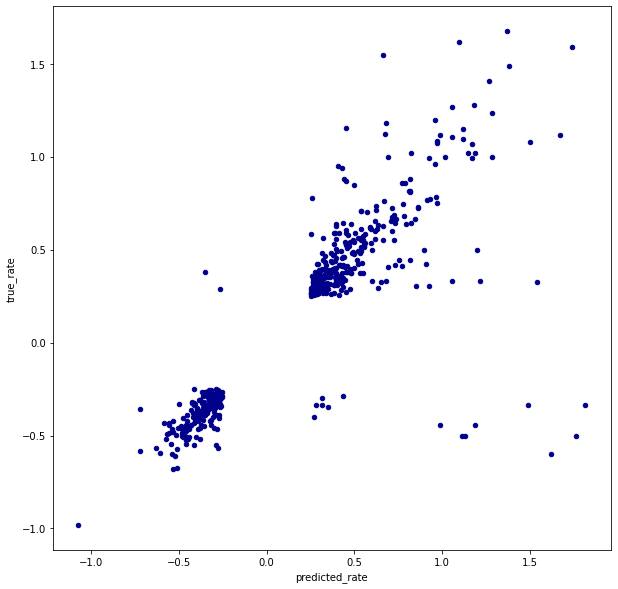

In [192]:
ax = largestat.plot.scatter(x='predicted_rate', y='true_rate',c='DarkBlue', figsize=(10,10))
# ax.set_yscale('log')
# ax.set_xscale('log')

In [195]:
# import matplotlib.pyplot as plt

# plt.hist([normalstat['predicted_rate'],normalstat['predicted_rate']],
#          bins=100, range=(-1,1), color = ['r','g'])

corr = largestat[["predicted_rate", "true_rate"]].corr()

corr.style.background_gradient(cmap='coolwarm')

,predicted_rate,true_rate
predicted_rate,1.000000,0.836427
true_rate,0.836427,1.000000


<AxesSubplot:xlabel='predicted_rate', ylabel='true_rate'>

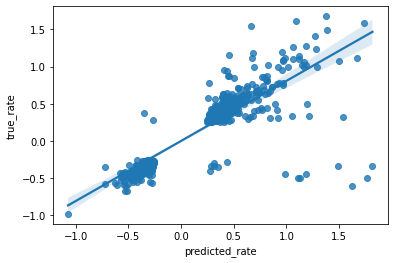

In [196]:

sns.regplot(x=largestat["predicted_rate"], y=largestat["true_rate"])


<AxesSubplot:>

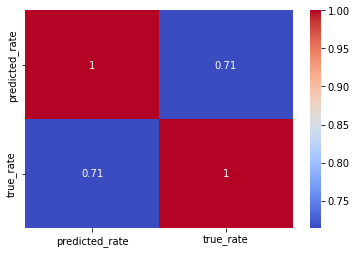

In [182]:
sns.heatmap(normalstat[["predicted_rate", "true_rate"]].corr(), annot = True, fmt='.2g',cmap= 'coolwarm')